# 1. Robots in Action
Let's start with some examples you may already have seen

In [2]:
from IPython.display import Video, display
display(Video("atlas.mp4", width=640, height=360, embed=True))
display(Video("eth.mp4", width=640, height=360, embed=True))

Those robots have in common that they are taking decisions online based on **numerical optimization**. 

More specifically, they optimize trajectories online by solving repeatedly an **Optimal Control Problem (OCP)**
\begin{align}
    \min_{\underline{x}, \underline{u}}~ & \sum_{k=0}^{T-1}~ \ell_k(x_k,u_k) + \ell_T(x_T) \\
    &\text{s.t.}~\begin{cases}
                x_0 &= \hat{x}\nonumber \\
                x_{k+1} &= f_k(x_k, u_k) \nonumber \\
                c_k\left(x_k,u_k\right) &\leq 0 \nonumber \\
                c_T\left(x_T\right) &\leq 0 \nonumber
                \end{cases}
\end{align}
This is called **Model-Predictive Control (MPC)**. 

<p style="text-align: center;">
Today, we will unpack together what this means and how it works!
</p>



# 2. Your First Trajectory Optimization: The Pendulum
Consider the simple pendulum : a mass $m$ attached to a rigid rod of length $l$ actuated by a motor torque $\tau$. 

**Question** : Which sequence of $\tau$ brings to its the upright equilibrium $(\theta,\dot \theta) = (0,0)$?

This problem can be formulated as an OCP. Let's solve it and analyze the solution.

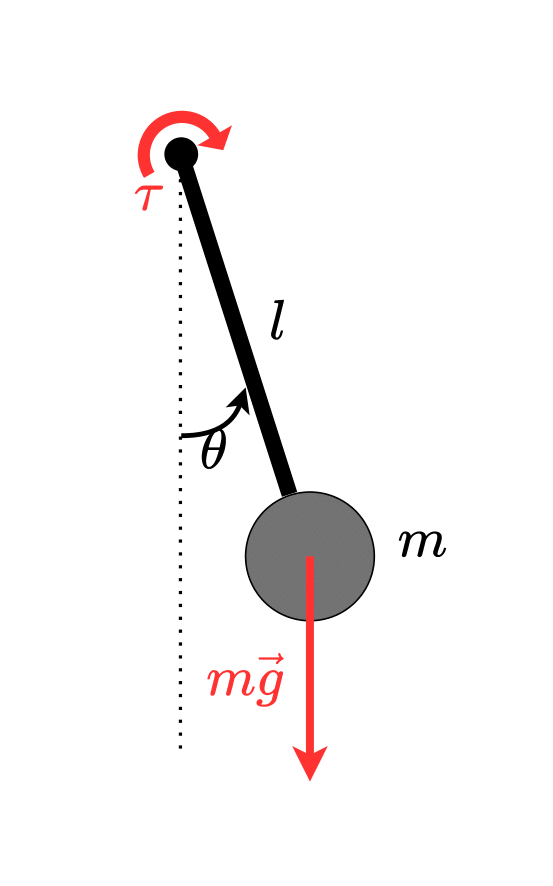

In [6]:
from IPython.display import Image, display
from pathlib import Path
notebook_dir = Path().resolve()  
display(Image(filename=str(notebook_dir / "pendulum" / "pendulum.png")))

First we install the necessary dependencies

In [3]:
import sys
if "google.colab" in sys.modules:
  !pip install mim_solvers

%cd ..
!pip install -e .

/home/skleff/misc_repos/mpc_tutorial
Obtaining file:///home/skleff/misc_repos/mpc_tutorial
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mpc_tutorial
    Found existing installation: mpc_tutorial 0.1
    Uninstalling mpc_tutorial-0.1:
      Successfully uninstalled mpc_tutorial-0.1
  DEPRECATION: Legacy editable install of mpc_tutorial==0.1 from file:///home/skleff/misc_repos/mpc_tutorial (setup.py develop) is deprecated. pip 25.3 will enforce this behaviour change. A possible replacement is to add a pyproject.toml or enable --use-pep517, and use setuptools >= 64. If the resulting installation is not behaving as expected, try using --config-settings editable_mode=compat. Please consult the setuptools documentation for more information. Discussion can be found at https://github.com/pypa/pip/issues/11457
  Running setup.py develop for mpc_tutorial


In [4]:
import pinocchio as pin
import crocoddyl
import mim_solvers
import numpy as np
print("✅ Environment ready")

✅ Environment ready


Now let's run this python scripts that formulates the OCP, solves it and displays the solution.

iter    merit      cost     ||gaps||   ||Constraint||   ||(dx,du)||    step     KKT criteria   QP iters 
   0  0.000e+00  1.026e-02  4.113e+00    0.000e+00      1.601e+00      1.000    3.166e+00      25  
   1  4.114e+01  9.326e-02  1.128e-01    0.000e+00      4.390e-02      1.000    2.651e-02      25  
   2  1.221e+00  9.252e-02  2.332e-05    0.000e+00      2.665e-04      1.000    2.325e-06      25  
   3  9.275e-02  9.252e-02  9.444e-10    0.000e+00         ----        ----     7.412e-09       -----  


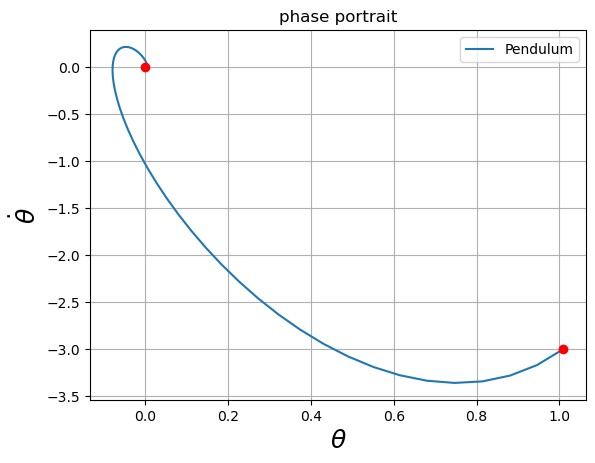

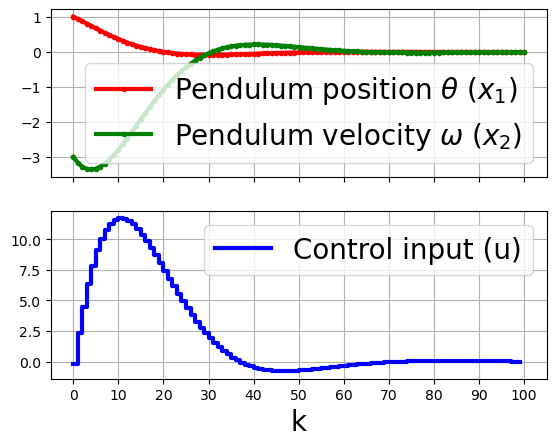

processing the animation ... 
... processing done


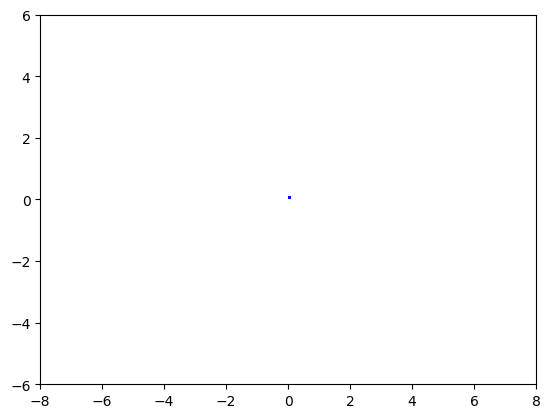

In [5]:
from pendulum.pendulum_utils import createPendulumOptimalControlProblem
from pendulum.pendulum_utils import plotPendulumSolution
from pendulum.pendulum_utils import animatePendulum

# Create the Optimal Control Problem 
x0 = np.array([1.01, -3.])
problem = createPendulumOptimalControlProblem(x0)

# Solve the OCP
solver = mim_solvers.SolverCSQP(problem)
solver.setCallbacks([mim_solvers.CallbackVerbose()])
solver.solve([], [], 200, False)

# Plot the solution
plotPendulumSolution(solver.xs, solver.us)

# Animate the solution
animatePendulum(solver.xs, show=False)

# 3. This Tutorial
## Objectives 
The main objective of this tutorial is to run **state-of-the-art MPC** on your machine and program your own tasks. The intermediate objectives are :
- Practical (i.e. "hands-on") understanding of Optimal Control Problems
- High-level understanding of Model-Predictive Control in robotics
- Understand the importance of being able to enforce constraints in robotics 

## Outline
The tutorial consists of 4 notebooks
- This introductory notebook
- Part 1 (notebooks/part1.ipynb) : Getting familiar with OCPs (~30min) 
- Part 2 (notebooks/part2.ipynb) : Toward Model-Predictive Control (~30min)
- Part 3 (notebooks/part3.ipynb) : Scaling to real-world MPC (~1h)
## Tools
- We will use the [Crocoddyl](https://github.com/loco-3d/crocoddyl) library to formulate Optimal Control Problem.
- We will use the [mim_solvers](https://github.com/machines-in-motion/mim_solvers) library to solve them